# Fandango flaws

* This a project regarding the comparision of movie ratings in fandango website
 and its html version.
* our goal in this project is to find out whether or not the fandango is showing fake ratings to viewers after hickey's analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=100
%matplotlib inline

In [2]:
fan_bef=pd.read_csv("fandango_score_comparison.csv")
fan_af=pd.read_csv("movie_ratings_16_17.csv")

In [3]:
fan_bef.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
fan_af.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
fan_bef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [6]:
fan_af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [7]:
fan_bef.shape

(146, 22)

In [8]:
fan_af.shape

(214, 15)

In [9]:
fan_b=fan_bef[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [10]:
fan_a=fan_af[['movie', 'year', 'fandango']]

In [11]:
fan_b.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [12]:
fan_a.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


# population of interest
our goal is to determine whether there has been any change in fandango's rating system after hickey's analysis.

To find out that our first step is to figure out whether both the samples are representative for the population we're trying to describe.

The population we are interested in is movies which have atleast 30 fan reviews on fandango 

we have two datasets with us which contain the movies of two different time periods.

* before hickey's analysis(2015)
* after hickey's analysis(2017)

we need to see if the movies are sampled randomly or not .

we know that movies in the first datasets are the ones which have a minimum of 30 fan reviews on fandango.

not every movie released will get 30 reviews there might be movies with less than 30 reviews.so selected movies are sampled

in second dataset selection is done based on:

* the release date of the movie. movie should be released in 2016 or later.
* if the movie has considerable number of votes . the number is exactly unknown


* so we can conclude that the data selected is not sampled randomly and that selected sample is not representative of population.

# Changing the goal of our analysis

sample we have is not representative of the population we are interested in describing.

at this point we have two alternatives : wither we collect new data, wither we change the goal of our analysis by placing some limitations on it.

we need to change our goal so that our sample is representative of population we are working with.

we will only consider the movies from the 2016 dataset that have atleast of 30 fan ratings. this is exactly the method that hickey used while selecting movoies for his analysis.so we will now select movies which are popular i.e which have alteast 30 fan ratings

In [13]:
fan_b[fan_b["Fandango_votes"]>30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.8+ KB


In [14]:
fan_a.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


we can see that for the first dataset all movies have fan ratings greater than 30 and in second dataset we dont have information about number of fan ratings so we have to consider if movies the movies that have a good fandango rating. we can see that 8 out of 10  movies have a rating greater than 3.0 so we can consider the sample as representative. we can go futher on our work.

In [15]:
fan_b[~fan_b["FILM"].str.contains("2015")].shape

(17, 5)

In [16]:
fan_a["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

we can see that we have movies that were not released in 2015 and 2016 .we need to isolate only the sample points that belong to our populations of interest.

we are going to :

* isolate movies released in 2016 in a seperate data set.

* isolate movies released in 2015 in another data set.

In [17]:
fan_2015=fan_b[fan_b["FILM"].str.contains('2015|2016')]

In [18]:
fan_2015[~fan_2015["FILM"].str.contains("2015")].shape

(0, 5)

we can see that after seperating movies released in 2015 into seperate dataset we dont have even one movie which released in year other than 2015.

In [19]:
fan_2016=fan_a[fan_a["year"]==2016]

In [20]:
fan_2016[~fan_2016["year"]==2016].shape

(0, 3)

even in second dataset we can see that after isolating movies released in 2016 we dont have movies released in any year other than 2016.

we will make a seperate column for year in 2015 dataset by using the film column of each row

In [21]:
fan_2015["year"]=fan_b["FILM"].str[-5:-1].astype(int)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
fan_2015["year"].dtypes

dtype('int64')

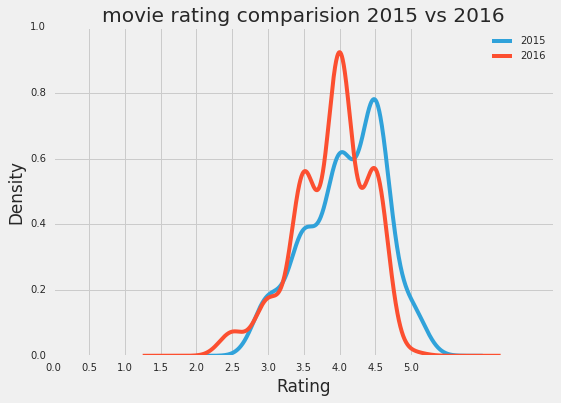

In [23]:
plt.style.use("fivethirtyeight")
fan_2015["Fandango_Stars"].plot.kde(label='2015',legend=True,figsize=(8,5.5))
fan_2016["fandango"].plot.kde(label="2016",legend=True)
plt.xticks(np.arange(0,5.5,0.5))
plt.xlabel("Rating")
plt.title("movie rating comparision 2015 vs 2016")
plt.show()

## 2015 vs 2016:
* 2015 graph is denoted by the blue line.shape of the 2015 distribution shows a slightly left skewed graph and with maximum density for rating 4.5 .
* 2016 graph is denoted by a red line, shows a normal distribution of density across various movies.with a maximum density for rating 4.0 .
* we can see a change in 2015 and 2016 movie ratings .In 2015 maximum density was for 4.5 while in 2016 maximum density is for 4.0, by which we can say that movies in 2016 got less ratings on a whole than in 2015.
* we can conclude that movies in 2016 were rated lower compared to 2015

In [24]:
print("2015" + "\n" + "-"*16)
fan_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [25]:
print("2016"+"\n"+"-"*16)
fan_2016["fandango"].value_counts(normalize=True).sort_index()*100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

above we are able to see percentages for each unique value in rating column of both the dataset.

1) in 2015 we had more of 4.5 ratings. 37.9 % are 4.5 ratings and only 8.5 percent are 3 ratings also we dont have even a single movie with less than 3.0 ratings in 2015.

2) where as in 2016 we have more of 4.0 raings than 4.5 ratings.40.3 percent are 4.0 ratings. 4.5 ratings percentage has decreased drastically.percentage of 4.5 raings is 24.6 . here we also have movies with 2.5 ratings.

3) 5.0 ratings have dropped greatly from 2015 to 2016 from 6.9 % to 0.52 % .

In [26]:
f1=fan_2015["Fandango_Stars"]
f2=fan_2016["fandango"]
mean_2015=f1.mean()
median_2015=f1.median()
mode_2015=f1.mode()[0]

mean_2016=f2.mean()
median_2016=f2.median()
mode_2016=f2.mode()[0]

summary=pd.DataFrame()
summary["2015"]=[mean_2015,median_2015,mode_2015]
summary["2016"]=[mean_2016,median_2016,mode_2016]

summary.index=["mean","median","mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


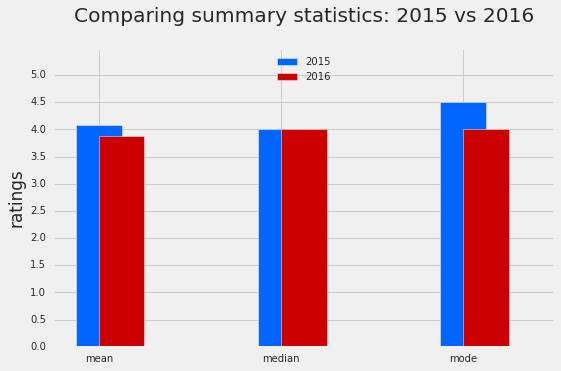

In [27]:
plt.style.use("fivethirtyeight")
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title("Comparing summary statistics: 2015 vs 2016",y=1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.5,0.5))
plt.ylabel("ratings")
plt.legend(loc="upper center")
plt.show()

# Conclusion :
hence we can conclude that the movie ratings after Walt Hickey's analysis have dropped from an average of 4.5 to 4.0 . so we can say that hickey's analysis caused the change for drop of movie rating.

our analysis showed that there's a slight difference between fandango's ratings for popular movies in 2015 and fandango's ratings for popular movies in 2016. we also deteremined that, on average, popular movies released in 2016 were rated lower on fandango than popular movies released in 2015.